✅ All libraries imported successfully
📊 Data Loaded:
   Training samples: 832
   Test samples: 209
   Features: 16
   Target range: [64.50, 81.80]
🔧 Model Configurations:
   ✓ KNN
   ✓ DECISION_TREE
   ✓ RANDOM_FOREST
   ✓ SVR
   ✓ RIDGE
TRAINING BASE MODELS WITH 10-FOLD CROSS-VALIDATION

🔄 Training KNN...
   ✅ KNN Trained
      10-Fold CV RMSE: 2.4032 ± 1.1021
      Test RMSE: 2.5769
      Test MAE: 2.0541
      Test R²: 0.1157
      Best Params: {'n_neighbors': 9, 'weights': 'uniform'}

🔄 Training DECISION_TREE...
   ✅ DECISION_TREE Trained
      10-Fold CV RMSE: 2.4063 ± 1.0527
      Test RMSE: 2.5643
      Test MAE: 2.0092
      Test R²: 0.1244
      Best Params: {'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2}

🔄 Training RANDOM_FOREST...
   ✅ RANDOM_FOREST Trained
      10-Fold CV RMSE: 2.2895 ± 1.0330
      Test RMSE: 2.5304
      Test MAE: 1.9717
      Test R²: 0.1473
      Best Params: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 200}

🔄 Training SVR

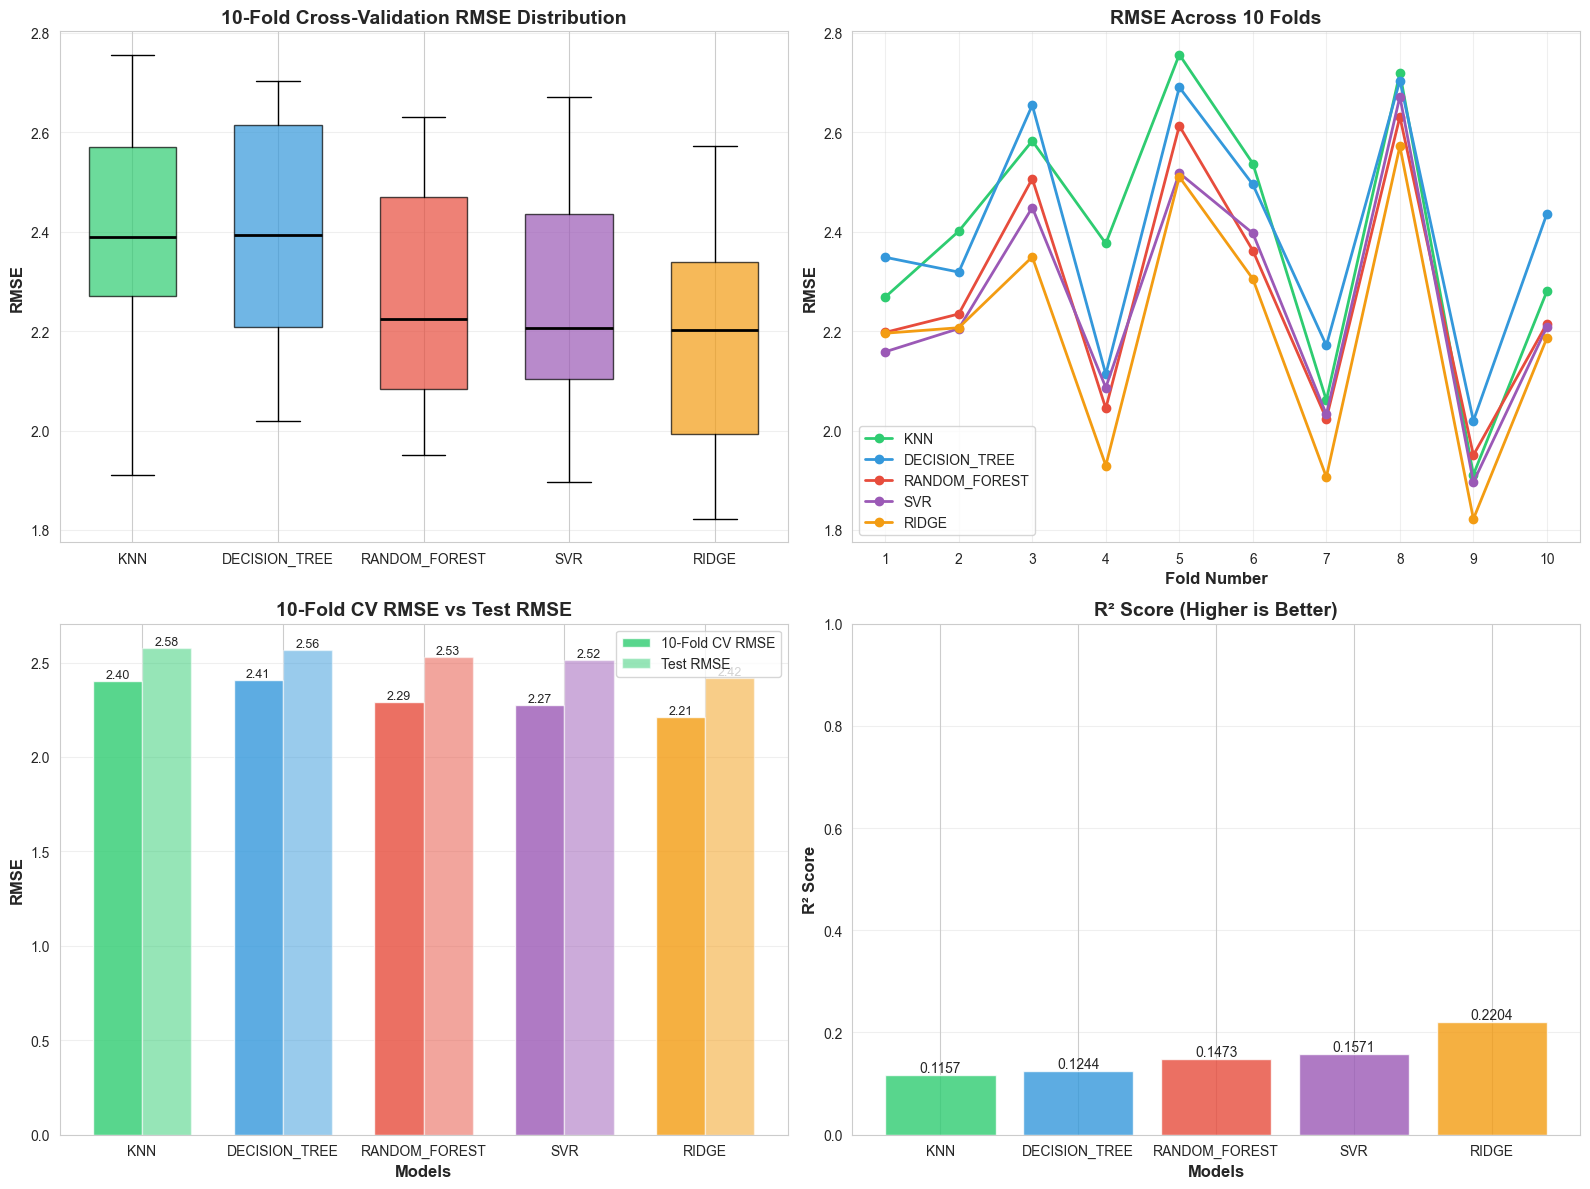


MODEL PERFORMANCE SUMMARY


,Model,CV RMSE,Test RMSE,Test MAE,Test R²
0,KNN,2.4032,2.5769,2.0541,0.1157
1,DECISION_TREE,2.4063,2.5643,2.0092,0.1244
2,RANDOM_FOREST,2.2895,2.5304,1.9717,0.1473
3,SVR,2.2737,2.5160,1.9562,0.1571
4,RIDGE,2.2112,2.4196,1.8676,0.2204



Best Model: RIDGE
   Test RMSE: 2.4196
   Test R²: 0.2204

DETAILED TEST RESULTS

KNN
   Test RMSE: 2.5769
   Test MAE:  2.0541
   Test R²:   0.1157
   10-Fold CV RMSE: 2.4032 ± 1.2147
   Mean Residual: 0.1036
   Std Residual:  2.5748

DECISION_TREE
   Test RMSE: 2.5643
   Test MAE:  2.0092
   Test R²:   0.1244
   10-Fold CV RMSE: 2.4063 ± 1.1083
   Mean Residual: 0.0548
   Std Residual:  2.5637

RANDOM_FOREST
   Test RMSE: 2.5304
   Test MAE:  1.9717
   Test R²:   0.1473
   10-Fold CV RMSE: 2.2895 ± 1.0671
   Mean Residual: 0.0448
   Std Residual:  2.5300

SVR
   Test RMSE: 2.5160
   Test MAE:  1.9562
   Test R²:   0.1571
   10-Fold CV RMSE: 2.2737 ± 1.0447
   Mean Residual: 0.0847
   Std Residual:  2.5145

RIDGE
   Test RMSE: 2.4196
   Test MAE:  1.8676
   Test R²:   0.2204
   10-Fold CV RMSE: 2.2112 ± 1.0465
   Mean Residual: -0.0347
   Std Residual:  2.4194

TEST PREDICTIONS ANALYSIS

KNN
   Total Test Samples: 209
   Mean Absolute Error: 2.0541
   Median Absolute Error: 1.5556
  

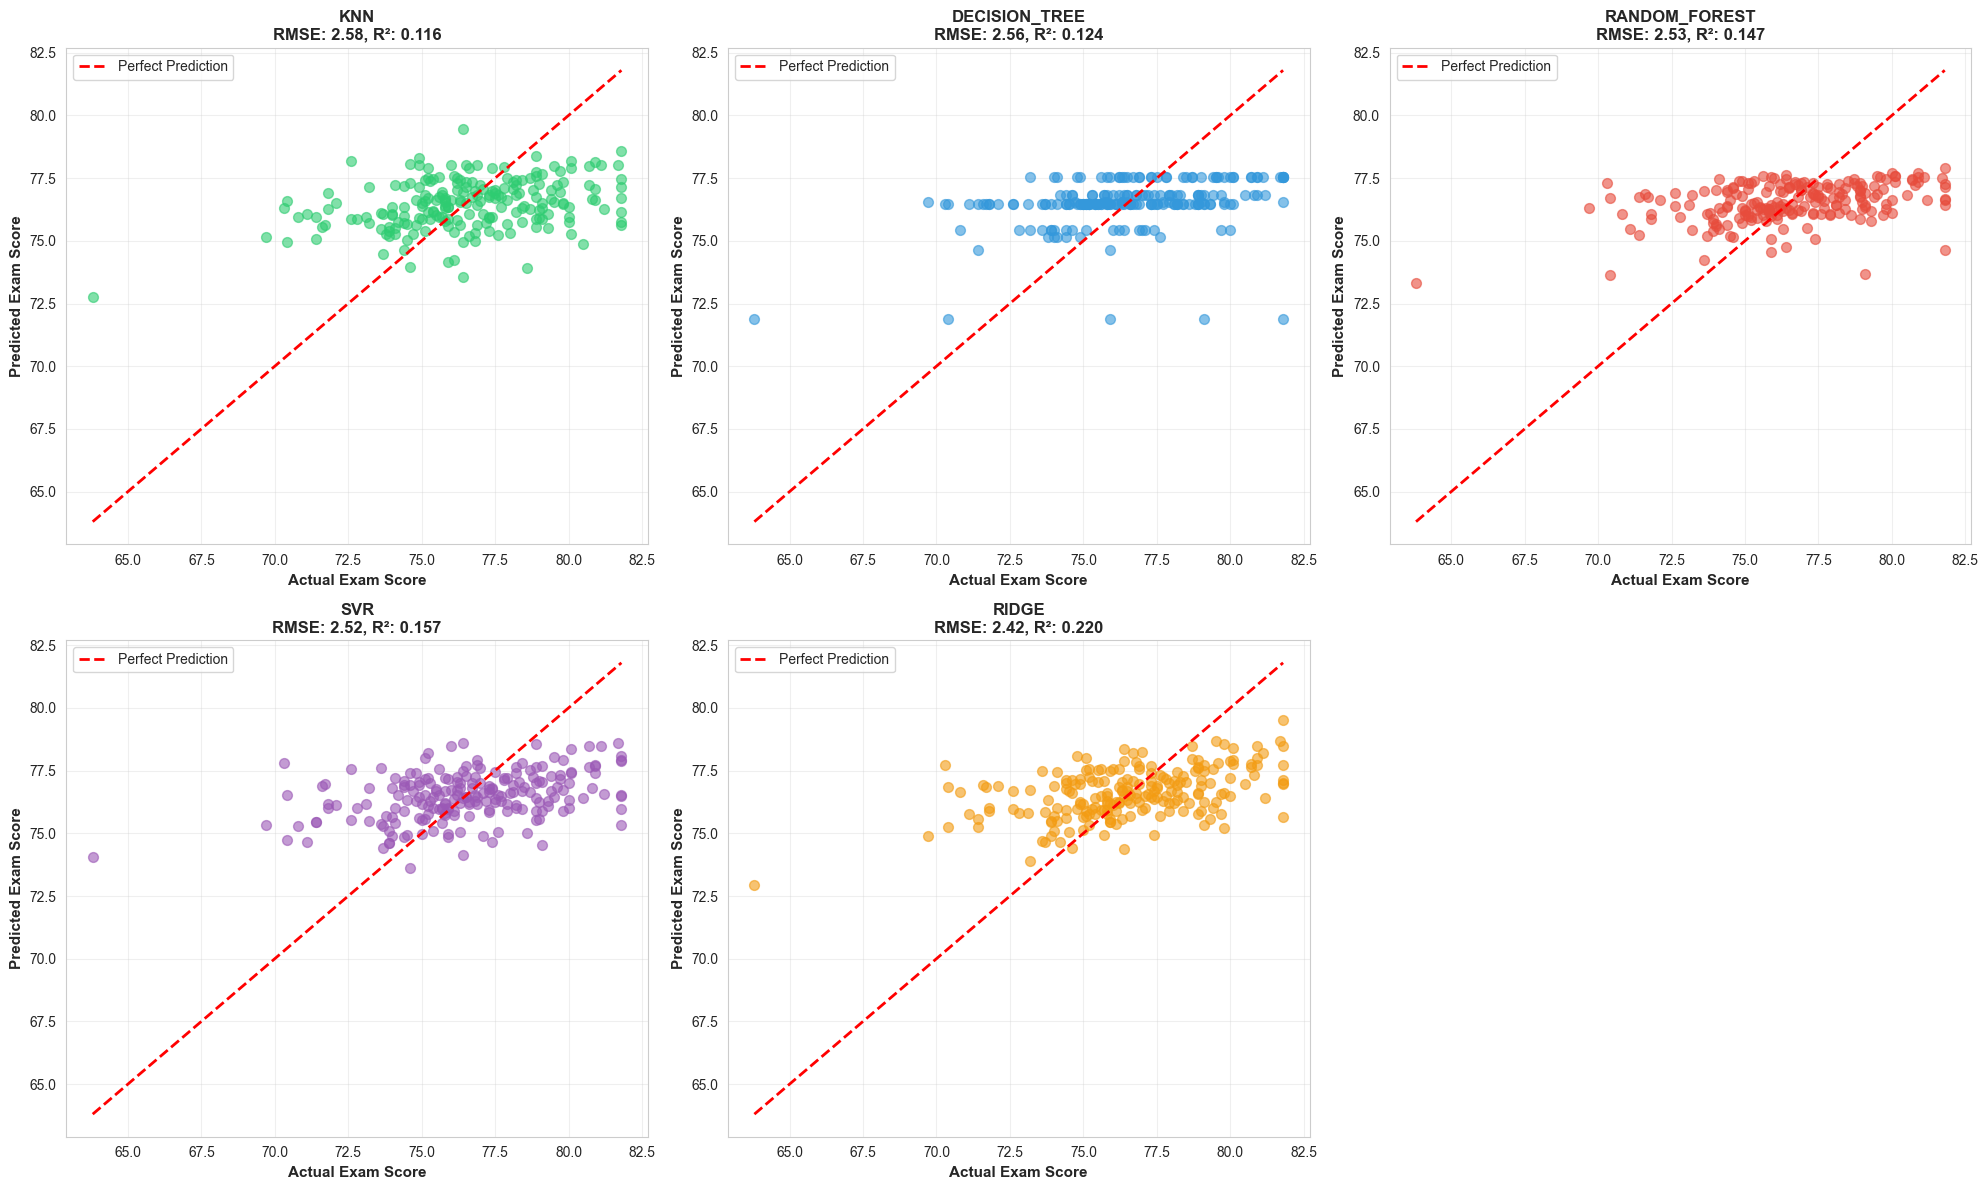

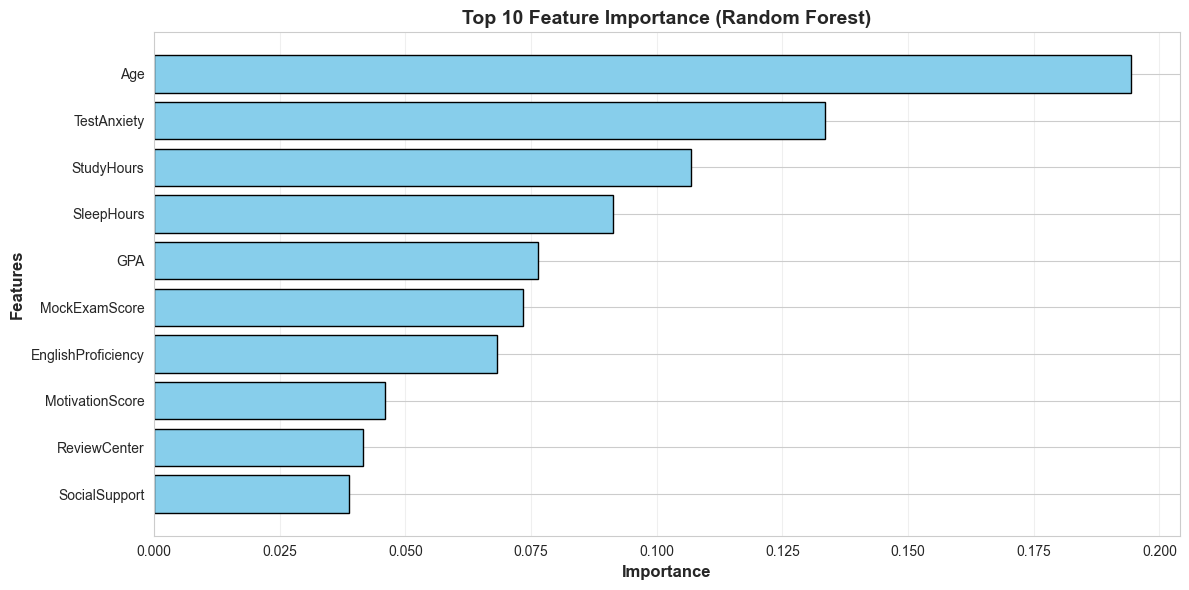


📊 Feature Importance:


,Feature,Importance
3,Age,0.194382
7,TestAnxiety,0.133489
4,StudyHours,0.106780
5,SleepHours,0.091338
9,GPA,0.076318
8,MockExamScore,0.073403
12,EnglishProficiency,0.068235
13,MotivationScore,0.045910
15,ReviewCenter,0.041616
14,SocialSupport,0.038800



💾 Models saved to saved_base_models/
✅ BASE MODELS TRAINING COMPLETE!

Preprocessor saved to ../saved_base_models/
Files created:
   - preprocessor.pkl
   - feature_names.pkl


In [1]:
# Cell 1: Imports
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os
import json
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 6)

print("✅ All libraries imported successfully")

# Cell 2: Preprocessed Data
X_train = np.load('../regression_processed_data/X_train.npy')
X_test = np.load('../regression_processed_data/X_test.npy')
y_train = np.load('../regression_processed_data/y_train.npy')
y_test = np.load('../regression_processed_data/y_test.npy')

print(f"📊 Data Loaded:")
print(f"   Training samples: {X_train.shape[0]}")
print(f"   Test samples: {X_test.shape[0]}")
print(f"   Features: {X_train.shape[1]}")
print(f"   Target range: [{y_train.min():.2f}, {y_train.max():.2f}]")

# Cell 3: Define Model Configurations
model_configs = {
    'knn': {
        'model': KNeighborsRegressor(),
        'params': {
            'n_neighbors': [3, 5, 7, 9],
            'weights': ['uniform', 'distance']
        }
    },
    'decision_tree': {
        'model': DecisionTreeRegressor(random_state=42),
        'params': {
            'max_depth': [3, 5, 7, 10, None],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    },
    'random_forest': {
        'model': RandomForestRegressor(random_state=42),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [5, 10, 15, None],
            'min_samples_split': [2, 5, 10]
        }
    },
        'svr': {
        'model': SVR(),
        'params': {
            'C': [0.1, 1.0, 10.0],
            'epsilon': [0.01, 0.1, 0.2],
            'kernel': ['rbf']
        }
    },
    'ridge': {
        'model': Ridge(),
        'params': {
            'alpha': [0.1, 1.0, 10.0, 100.0]
        }
    }
}

print("🔧 Model Configurations:")
for name in model_configs.keys():
    print(f"   ✓ {name.upper()}")

# Cell 4: Train Models with 10-Fold CV
from sklearn.model_selection import KFold

results = {}
cv = KFold(n_splits=10, shuffle=True, random_state=42)

print("=" * 70)
print("TRAINING BASE MODELS WITH 10-FOLD CROSS-VALIDATION")
print("=" * 70)

for name, config in model_configs.items():
    print(f"\n🔄 Training {name.upper()}...")
    
    grid_search = GridSearchCV(
        config['model'],
        config['params'],
        cv=cv,
        scoring='neg_mean_squared_error',
        n_jobs=-1,
        return_train_score=True
    )
    
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    
    cv_results = grid_search.cv_results_
    best_index = grid_search.best_index_
    
    fold_scores = []
    for fold_idx in range(10):
        fold_key = f'split{fold_idx}_test_score'
        fold_scores.append(-cv_results[fold_key][best_index])
    
    cv_mean = np.mean(fold_scores)
    cv_std = np.std(fold_scores)
    cv_min = np.min(fold_scores)
    cv_max = np.max(fold_scores)
    
    cv_rmse = np.sqrt(cv_mean)
    
    y_pred = best_model.predict(X_test)
    test_mse = mean_squared_error(y_test, y_pred)
    test_rmse = np.sqrt(test_mse)
    test_mae = mean_absolute_error(y_test, y_pred)
    test_r2 = r2_score(y_test, y_pred)
    
    results[name] = {
        'model': best_model,
        'cv_mse_mean': cv_mean,
        'cv_mse_std': cv_std,
        'cv_mse_min': cv_min,
        'cv_mse_max': cv_max,
        'cv_rmse': cv_rmse,
        'cv_10fold_scores': fold_scores,
        'test_mse': test_mse,
        'test_rmse': test_rmse,
        'test_mae': test_mae,
        'test_r2': test_r2,
        'y_pred': y_pred,
        'best_params': grid_search.best_params_
    }
    
    print(f"   ✅ {name.upper()} Trained")
    print(f"      10-Fold CV RMSE: {cv_rmse:.4f} ± {np.sqrt(cv_std):.4f}")
    print(f"      Test RMSE: {test_rmse:.4f}")
    print(f"      Test MAE: {test_mae:.4f}")
    print(f"      Test R²: {test_r2:.4f}")
    print(f"      Best Params: {grid_search.best_params_}")

# Cell 5: Visualize 10-Fold CV Results
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

model_names = list(results.keys())
colors = ['#2ecc71', '#3498db', '#e74c3c',  '#9b59b6', '#f39c12']

# Plot 1: Box plot of 10-fold scores (RMSE)
fold_data = []
for name in model_names:
    for fold_idx, mse in enumerate(results[name]['cv_10fold_scores'], 1):
        fold_data.append({
            'Model': name.upper(),
            'Fold': fold_idx,
            'RMSE': np.sqrt(mse)
        })

fold_df = pd.DataFrame(fold_data)

box_positions = []
for idx, name in enumerate(model_names):
    model_data = fold_df[fold_df['Model'] == name.upper()]['RMSE']
    bp = axes[0, 0].boxplot([model_data], positions=[idx], widths=0.6,
                            patch_artist=True,
                            boxprops=dict(facecolor=colors[idx], alpha=0.7),
                            medianprops=dict(color='black', linewidth=2))
    box_positions.append(idx)

axes[0, 0].set_xticks(box_positions)
axes[0, 0].set_xticklabels([name.upper() for name in model_names])
axes[0, 0].set_ylabel('RMSE', fontsize=12, fontweight='bold')
axes[0, 0].set_title('10-Fold Cross-Validation RMSE Distribution', fontsize=14, fontweight='bold')
axes[0, 0].grid(axis='y', alpha=0.3)

# Plot 2: Line plot showing each fold's performance
for idx, name in enumerate(model_names):
    fold_rmse = [np.sqrt(mse) for mse in results[name]['cv_10fold_scores']]
    axes[0, 1].plot(range(1, 11), fold_rmse, marker='o', linewidth=2,
                   label=name.upper(), color=colors[idx])

axes[0, 1].set_xlabel('Fold Number', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('RMSE', fontsize=12, fontweight='bold')
axes[0, 1].set_title('RMSE Across 10 Folds', fontsize=14, fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)
axes[0, 1].set_xticks(range(1, 11))

# Plot 3: CV RMSE vs Test RMSE comparison
x = np.arange(len(model_names))
width = 0.35

cv_rmse_values = [results[name]['cv_rmse'] for name in model_names]
test_rmse_values = [results[name]['test_rmse'] for name in model_names]

bars1 = axes[1, 0].bar(x - width/2, cv_rmse_values, width, label='10-Fold CV RMSE',
                       color=colors, alpha=0.8)
bars2 = axes[1, 0].bar(x + width/2, test_rmse_values, width, label='Test RMSE',
                       color=colors, alpha=0.5)

for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        axes[1, 0].text(bar.get_x() + bar.get_width()/2., height,
                       f'{height:.2f}', ha='center', va='bottom', fontsize=9)

axes[1, 0].set_xlabel('Models', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('RMSE', fontsize=12, fontweight='bold')
axes[1, 0].set_title('10-Fold CV RMSE vs Test RMSE', fontsize=14, fontweight='bold')
axes[1, 0].set_xticks(x)
axes[1, 0].set_xticklabels([name.upper() for name in model_names])
axes[1, 0].legend()
axes[1, 0].grid(axis='y', alpha=0.3)

# Plot 4: R² Score comparison
r2_scores = [results[name]['test_r2'] for name in model_names]

bars = axes[1, 1].bar([name.upper() for name in model_names], r2_scores,
                      color=colors, alpha=0.8)

for bar in bars:
    height = bar.get_height()
    axes[1, 1].text(bar.get_x() + bar.get_width()/2., height,
                   f'{height:.4f}', ha='center', va='bottom', fontsize=10)

axes[1, 1].set_xlabel('Models', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('R² Score', fontsize=12, fontweight='bold')
axes[1, 1].set_title('R² Score (Higher is Better)', fontsize=14, fontweight='bold')
axes[1, 1].grid(axis='y', alpha=0.3)
axes[1, 1].set_ylim([0, 1])

plt.tight_layout()
plt.show()

# Cell 6: Performance Summary Table
summary_data = []
for name in model_names:
    summary_data.append({
        'Model': name.upper(),
        'CV RMSE': f"{results[name]['cv_rmse']:.4f}",
        'Test RMSE': f"{results[name]['test_rmse']:.4f}",
        'Test MAE': f"{results[name]['test_mae']:.4f}",
        'Test R²': f"{results[name]['test_r2']:.4f}"
    })

summary_df = pd.DataFrame(summary_data)
print("\n" + "=" * 70)
print("MODEL PERFORMANCE SUMMARY")
print("=" * 70)
display(summary_df)

best_model_name = min(results.items(), key=lambda x: x[1]['test_rmse'])[0]
print(f"\nBest Model: {best_model_name.upper()}")
print(f"   Test RMSE: {results[best_model_name]['test_rmse']:.4f}")
print(f"   Test R²: {results[best_model_name]['test_r2']:.4f}")

print("\n" + "=" * 70)
print("DETAILED TEST RESULTS")
print("=" * 70)

for name in model_names:
    y_pred = results[name]['y_pred']
    rmse = results[name]['test_rmse']
    mae = results[name]['test_mae']
    r2 = results[name]['test_r2']
    
    print(f"\n{name.upper()}")
    print(f"   Test RMSE: {rmse:.4f}")
    print(f"   Test MAE:  {mae:.4f}")
    print(f"   Test R²:   {r2:.4f}")
    print(f"   10-Fold CV RMSE: {results[name]['cv_rmse']:.4f} ± {results[name]['cv_mse_std']:.4f}")
    
    residuals = y_test - y_pred
    print(f"   Mean Residual: {np.mean(residuals):.4f}")
    print(f"   Std Residual:  {np.std(residuals):.4f}")

# Cell 6.5: Detailed Test Predictions Analysis
print("\n" + "=" * 70)
print("TEST PREDICTIONS ANALYSIS")
print("=" * 70)

for name in model_names:
    y_pred = results[name]['y_pred']
    
    prediction_details = pd.DataFrame({
        'Actual': y_test,
        'Predicted': y_pred,
        'Error': y_test - y_pred,
        'Absolute_Error': np.abs(y_test - y_pred),
        'Percent_Error': np.abs((y_test - y_pred) / y_test) * 100
    })
    
    print(f"\n{name.upper()}")
    print(f"   Total Test Samples: {len(y_test)}")
    print(f"   Mean Absolute Error: {prediction_details['Absolute_Error'].mean():.4f}")
    print(f"   Median Absolute Error: {prediction_details['Absolute_Error'].median():.4f}")
    print(f"   Max Error: {prediction_details['Absolute_Error'].max():.4f}")
    print(f"   Min Error: {prediction_details['Absolute_Error'].min():.4f}")
    
    print(f"\n   First 10 predictions:")
    print(prediction_details.head(10).to_string(index=False))
    
    csv_file = f'../saved_base_models/{name}_test_predictions.csv'
    prediction_details.to_csv(csv_file, index=False)
    print(f"\n   Saved detailed predictions: {csv_file}")

# Cell 7: Prediction vs Actual Plots
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.flatten()

for idx, name in enumerate(model_names):
    y_pred = results[name]['y_pred']
    
    # Scatter plot
    axes[idx].scatter(y_test, y_pred, alpha=0.6, s=50, color=colors[idx])
    
    # Perfect prediction line
    min_val = min(y_test.min(), y_pred.min())
    max_val = max(y_test.max(), y_pred.max())
    axes[idx].plot([min_val, max_val], [min_val, max_val], 
                   'r--', linewidth=2, label='Perfect Prediction')
    
    # Metrics
    rmse = results[name]['test_rmse']
    r2 = results[name]['test_r2']
    
    axes[idx].set_xlabel('Actual Exam Score', fontsize=11, fontweight='bold')
    axes[idx].set_ylabel('Predicted Exam Score', fontsize=11, fontweight='bold')
    axes[idx].set_title(f'{name.upper()}\nRMSE: {rmse:.2f}, R²: {r2:.3f}',
                       fontsize=12, fontweight='bold')
    axes[idx].legend()
    axes[idx].grid(alpha=0.3)

axes[5].axis('off')

plt.tight_layout()
plt.show()

# Cell 8: Feature Importance
if 'random_forest' in results:
    feature_names = json.load(open('../regression_processed_data/feature_names.json'))
    
    rf_model = results['random_forest']['model']
    feature_importance = pd.DataFrame({
        'Feature': feature_names,
        'Importance': rf_model.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    plt.figure(figsize=(12, 6))
    plt.barh(feature_importance['Feature'][:10], 
             feature_importance['Importance'][:10],
             color='skyblue', edgecolor='black')
    plt.xlabel('Importance', fontsize=12, fontweight='bold')
    plt.ylabel('Features', fontsize=12, fontweight='bold')
    plt.title('Top 10 Feature Importance (Random Forest)', 
              fontsize=14, fontweight='bold')
    plt.gca().invert_yaxis()
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print("\n📊 Feature Importance:")
    display(feature_importance)

# Cell 9: Save Models
os.makedirs('../saved_base_models', exist_ok=True)

for name, data in results.items():
    joblib.dump(data['model'], f'../saved_base_models/{name}_model.pkl')

print("\n💾 Models saved to saved_base_models/")
print("✅ BASE MODELS TRAINING COMPLETE!")

# Cell 10: Create and Save Preprocessor
import joblib
import os
import sys

models_path = os.path.abspath('..')
if models_path not in sys.path:
    sys.path.insert(0, models_path)

from regression_preprocessor import RegressionPreprocessor

# Load the correct imputers
label_encoders = joblib.load('../regression_processed_data/label_encoders.pkl')
iterative_imputer = joblib.load('../regression_processed_data/iterative_imputer.pkl')
median_imputer = joblib.load('../regression_processed_data/median_imputer.pkl')
scaler = joblib.load('../regression_processed_data/scaler.pkl')
feature_names = json.load(open('../regression_processed_data/feature_names.json'))

# Load imputation config to know which columns use which imputer
with open('../regression_processed_data/imputation_config.json', 'r') as f:
    imputation_config = json.load(f)

# Create preprocessor with both imputers
preprocessor = RegressionPreprocessor(
    iterative_imputer=iterative_imputer,
    median_imputer=median_imputer,
    label_encoders=label_encoders,
    scaler=scaler,
    imputation_config=imputation_config
)

# Save preprocessor
joblib.dump(preprocessor, '../saved_base_models/preprocessor.pkl')
joblib.dump(feature_names, '../saved_base_models/feature_names.pkl')

print("\nPreprocessor saved to ../saved_base_models/")
print("Files created:")
print("   - preprocessor.pkl")
print("   - feature_names.pkl")
